<a href="https://colab.research.google.com/github/Venchislav/Neural-Networks/blob/main/Car_Emissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [700]:
import pandas as pd
import numpy as np

In [701]:
df = pd.read_csv('/content/sample_data/Sample.csv')
df.head()

,MODEL,MAKE,MODEL.1,VEHICLE CLASS,ENGINE_SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL_CONSUMPTION*,Unnamed: 9,Unnamed: 10,Unnamed: 11,CO2_EMISSIONS
0,2001,ACURA,1.7EL,COMPACT,1.7,4,A4,X,9.3,7.2,8.3,34,191
1,2001,ACURA,1.7EL,COMPACT,1.7,4,M5,X,8.9,7.4,8.3,34,191
2,2001,ACURA,3.2CL,COMPACT,3.2,6,AS5,Z,13.7,8.8,11.5,25,265
3,2001,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.8,8.8,11.6,24,267
4,2001,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0,10.9,13.1,22,301


In [702]:
df.shape

(679, 13)

In [703]:
df.isnull().sum()

MODEL                0
MAKE                 0
MODEL.1              0
VEHICLE CLASS        0
ENGINE_SIZE          0
CYLINDERS            0
TRANSMISSION         0
FUEL                 0
FUEL_CONSUMPTION*    0
Unnamed: 9           0
Unnamed: 10          0
Unnamed: 11          0
CO2_EMISSIONS        0
dtype: int64

In [704]:
obj_cols = []
for i, c in enumerate(df.dtypes):
  if c == object:
    obj_cols.append(df.columns[i])

obj_cols

['MAKE', 'MODEL.1', 'VEHICLE CLASS', 'TRANSMISSION', 'FUEL']

In [705]:
from sklearn.preprocessing import LabelEncoder

In [706]:
enc = LabelEncoder()

In [707]:
for c in obj_cols:
  df[c] = enc.fit_transform(df[c])

In [708]:
df.head()

,MODEL,MAKE,MODEL.1,VEHICLE CLASS,ENGINE_SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL_CONSUMPTION*,Unnamed: 9,Unnamed: 10,Unnamed: 11,CO2_EMISSIONS
0,2001,0,0,0,1.7,4,1,3,9.3,7.2,8.3,34,191
1,2001,0,0,0,1.7,4,6,3,8.9,7.4,8.3,34,191
2,2001,0,1,0,3.2,6,4,4,13.7,8.8,11.5,25,265
3,2001,0,2,2,3.2,6,4,4,13.8,8.8,11.6,24,267
4,2001,0,3,2,3.5,6,1,4,15.0,10.9,13.1,22,301


Ok. Let's start from predicting rating

In [709]:
X = df.drop('CO2_EMISSIONS', axis=1)
y = df['CO2_EMISSIONS']

In [710]:
col_names = X.columns

In [711]:
from sklearn.preprocessing import MinMaxScaler

In [712]:
scaler = MinMaxScaler((0, 1))

In [713]:
X = scaler.fit_transform(X)

In [714]:
X = pd.DataFrame(X, columns=col_names)

In [715]:
X.head()

,MODEL,MAKE,MODEL.1,VEHICLE CLASS,ENGINE_SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL_CONSUMPTION*,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,0.0,0.0,0.000000,0.000000,0.100000,0.111111,0.142857,0.75,0.240437,0.228571,0.233129,0.408163
1,0.0,0.0,0.000000,0.000000,0.100000,0.111111,0.857143,0.75,0.218579,0.242857,0.233129,0.408163
2,0.0,0.0,0.002857,0.000000,0.314286,0.333333,0.571429,1.00,0.480874,0.342857,0.429448,0.224490
3,0.0,0.0,0.005714,0.153846,0.314286,0.333333,0.571429,1.00,0.486339,0.342857,0.435583,0.204082
4,0.0,0.0,0.008571,0.153846,0.357143,0.333333,0.142857,1.00,0.551913,0.492857,0.527607,0.163265


In [716]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [717]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1)

In [718]:
print(f'{X_train.shape}-----{y_train.shape}\n{"="*60}')
print(f'{X_test.shape}-----{y_test.shape}')

(611, 12)-----(611,)
(68, 12)-----(68,)


In [719]:
X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

In [720]:
X_train, y_train = shuffle(X_train, y_train)

In [721]:
X_test, y_test = shuffle(X_test, y_test)

In [722]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [723]:
inp_shape = [X.shape[1]]
inp_shape

[12]

In [724]:
model = Sequential([
    layers.Dense(20, activation='relu', input_shape=inp_shape),
    layers.Dense(10, activation='relu'),
    layers.Dense(1, activation='relu')
])

In [725]:
model.compile(
    loss='msle',
    optimizer='adam'
)

In [726]:
hist = model.fit(
    X_train, y_train,
    validation_split=0.1,
    batch_size=256,
    epochs=1000,
    shuffle=True,
    verbose=0
)

In [727]:
h_df = pd.DataFrame(hist.history)
h_df

,loss,val_loss
0,32.145599,32.032688
1,32.133263,31.988302
2,32.082920,31.901068
3,31.941296,31.672985
4,31.653187,31.268908
...,...,...
995,0.021320,0.019084
996,0.021312,0.019074
997,0.021304,0.019065
998,0.021296,0.019055


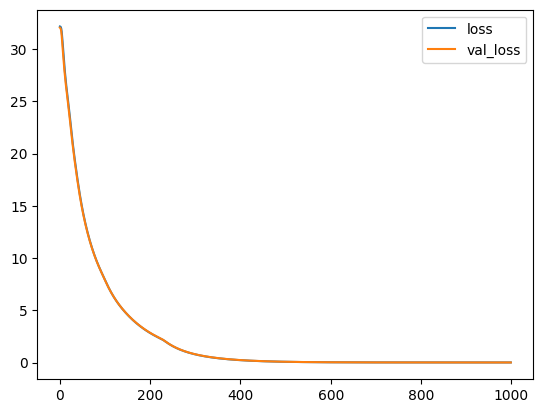

In [728]:
h_df.loc[:, ['loss', 'val_loss']].plot();

In [729]:
pred = model.predict(X_test)

3/3 [==============================] - 0s 4ms/step


In [730]:
pred[:5]

array([[312.12128],
       [308.00537],
       [260.11417],
       [334.73633],
       [326.02225]], dtype=float32)

In [731]:
y_test[:5]

array([239, 343, 267, 336, 317])

**Not so good, but still**<br>
<img src='https://media.tenor.com/EJbGrG_eBsYAAAAC/pulp-fiction-briefcase.gif'>